<a href="https://colab.research.google.com/github/akaAraujo/data_science/blob/main/Analise_De_Dados_Vancouver_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto 01 - Análise de Dados - Airbnb - Vancouver**

O **Airbnb** nasceu em 2007, quando dois anfitriões receberam três hóspedes em sua casa em São Francisco. Hoje, a plataforma conta com mais de **5 milhões de anfitriões** que já receberam mais de **2 bilhões de hóspedes** em quase todos os países do mundo. Todos os dias, os anfitriões oferecem acomodações e experiências únicas que possibilitam que os viajantes conheçam outras comunidades de uma forma mais autêntica.

Vale destacar que o Airbnb disponibiliza os dados referentes as locações das principais cidades do mundo pelo portal [Inside Airbnb](https://insideairbnb.com/) nesse caso iremos realizar a análise referete aos dados da cidade de Vancouver, British Columbia, Canadá.

**Vancouver** é a segunda cidade mais visitada pelos turistas no Canadá, localizada na costa oeste da provincia de British Columbia a cidade registrou o incrível número de **9.5 milhões de turistas** no ano de 2023, um crescimento de **19% em comparação com o ano anterior**.

In [1]:
# 1 - Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = "svg"
plt.rcParams["font.family"] = "sans-serif"

In [2]:
# 2 - Acessando a base de dados
df = pd.read_csv("/content/listings.csv")

In [3]:
# 3 - Verificando a quantidade de linhas e colunas
df.shape

(6167, 18)

In [4]:
# 4 - Verificando o nome das colunas
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
# 5 Verificando os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6167 non-null   int64  
 1   name                            6167 non-null   object 
 2   host_id                         6167 non-null   int64  
 3   host_name                       6167 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6167 non-null   object 
 6   latitude                        6167 non-null   float64
 7   longitude                       6167 non-null   float64
 8   room_type                       6167 non-null   object 
 9   price                           4935 non-null   float64
 10  minimum_nights                  6167 non-null   int64  
 11  number_of_reviews               6167 non-null   int64  
 12  last_review                     52

Significado de cada coluna:

id - número de id gerado cuja finalidade é identificar o imóvel;

name - nome da propriedade anunciada;

host_id - número de id do proprietário (anfitrião) da propriedade;

host_name - nome do anfitrião;

neighbourhood_group - esta coluna não possui valor válido;

neighbourhood - nome do bairro;

latitude - coordenada da latitude do imóvel;

longitude - coordenada da longitude do imóvel;

room_type - informação sobre o tipo de quarto que é ofertado;

price - preço para alugar o imóvel;

minimum_nights - período mínimo de noites por reserva;

number_of_reviews - número de reviews que o imóvel possui;

last_review - data do último review;

reviews_per_month - quantidade de reviews por mês;

calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião;

availability_365 - número de dias disponíveis em 365 dias.

In [ ]:
# 6 - Verificando as primeiras linhas da base de dados
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,13188,Garden level studio in ideal loc.,51466,Emma,NaN,Riley Park,49.247730,-123.105090,Entire home/apt,140.0,2,339,2024-10-20,1.89,1,214,56,24-157388
1,13358,Curated Designer Downtown Suite,52116,Lynn,NaN,Downtown,49.281174,-123.125931,Entire home/apt,190.0,1,547,2024-10-25,3.12,1,87,56,24-159219
2,16254,Close to PNE/Hastings Park Garden level suite,63238,Jason,NaN,Hastings-Sunrise,49.277210,-123.040860,Entire home/apt,800.0,5,7,2022-07-30,0.09,1,70,0,NaN
3,16611,"1 block to skytrain station, shops,restaurant,...",58512,Q,NaN,Grandview-Woodland,49.263390,-123.071450,Entire home/apt,NaN,365,3,2018-02-16,0.04,5,90,0,NaN
4,17765,"Central location, nice little apartment",68672,James,NaN,Mount Pleasant,49.261320,-123.108450,Entire home/apt,NaN,5,203,2021-10-01,1.38,1,0,0,21-156705


In [ ]:
# 7 - Verificando a existência de valores NaN (Nulos)
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


A coluna **neighbourhood_group** possui apenas dados NaN, por conta disso ela será removida da base de dados, assim como as linhas que possuem a coluna **price** como NaN

In [5]:
# 8 - Excluindo a coluna neighbourhood_group com o método drop
df.drop("neighbourhood_group", axis=1, inplace=True)

In [6]:
# 9 - Removendo as linhas com valores NaN da coluna price com o método dropna
df.dropna(subset=["price"], inplace=True)

In [ ]:
# 10 - Verificando o resumo estatístico das colunas com valores numéricos
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].describe().round()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4935.0,4935.0,4935.0,4214.0,4935.0,4935.0
mean,216.0,24.0,53.0,2.0,8.0,175.0
std,480.0,38.0,86.0,2.0,22.0,116.0
min,14.0,1.0,0.0,0.0,1.0,0.0
25%,105.0,1.0,3.0,0.0,1.0,71.0
50%,150.0,3.0,19.0,2.0,1.0,159.0
75%,223.0,30.0,69.0,3.0,4.0,276.0
max,20000.0,399.0,1031.0,14.0,135.0,365.0


Ao observar o resumo é possível identificar que de acordo com a coluna **minimum_nights** **50%** das locações ocorrem em até **3 diárias** e **75%** ocorrem em um período de até **30 dias**, criando assim **2 grupos** distindos de locatários. Também é possível observar que o **valor médio** das locações na coluna **price** é de **150 dólares**, sendo o valor máximo de **20 mil dólares**.

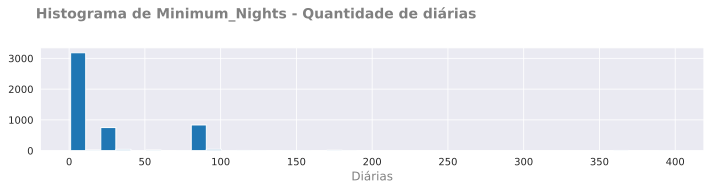

In [ ]:
# 11 - Plotando histograma da coluna "minimum_nights"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
ax.hist("minimum_nights", data = df, bins = 40)
ax.text(-22, 4300, "Histograma de Minimum_Nights - Quantidade de diárias",
        color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_ylabel("")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
plt.tight_layout()

O gráfico de **histograma** mostra uma concentração de locações abaixo das **100 diárias**, visualmente mais próximas das **30 diárias** e outra mais próxima das **90 diárias**.

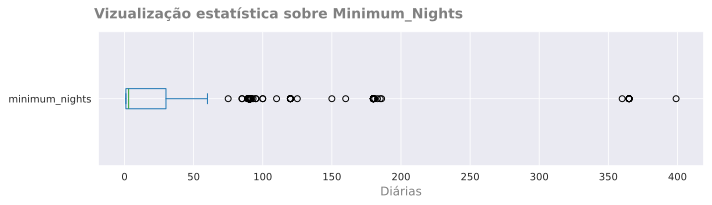

In [ ]:
# 12 - Plotando o boxplot da coluna "minimum_nights"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
df.minimum_nights.plot(kind = "box", vert = False, ax = ax)
ax.text(-22, 1.6, "Vizualização estatística sobre Minimum_Nights", color = "grey", fontsize = 14, fontweight = "bold")
ax.set_ylabel("")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
plt.tight_layout()

In [ ]:
# 13 - Quantidade de locações por período de locação até 30 dias
print(f"Total de locações de até 30 dias pela coluna minimum_nights: {(len(df[df.minimum_nights <= 30]))}.")
print("Percentual de correspondência da base de dados: {:.2f}%".format((len(df[df.minimum_nights <= 30]) / df.shape[0])*100))

Total de locações de até 30 dias pela coluna minimum_nights: 3172.
Percentual de correspondência da base de dados: 64.28%


Por meio do **boxplot** é possível identificar que a quantidade mínima de noites está concentrata nos primeiros valores, existem valores descrepantes porém com o resumo é possível identificar que as locações de até **30 diárias** correspondem a aproximadamente **80%**.

In [7]:
# 14 - Gerando uma cópia da base de dados
df_copia = df.copy()

Para aprofundar o tratamento e melhorar a visualização dos dados os valores outliers da coluna **minimum_nights**, ou seja, serão removidos todos os valores acima das **30 diárias**.

In [8]:
# 15 - Removendo valores "outliers" da coluna minimum_nights
df_copia.drop(df_copia[df_copia.minimum_nights > 30].index, axis = 0, inplace = True)

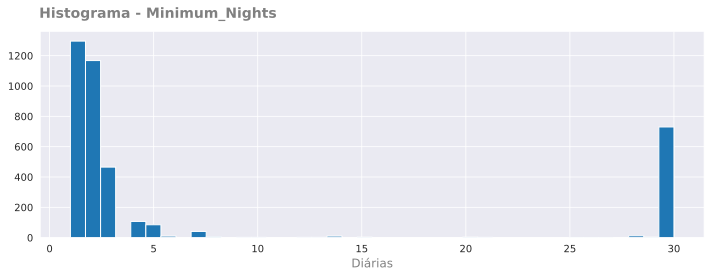

In [ ]:
# 16 - Plotando um histograma da coluna "minimum_nights" sem os "outliers"
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,4), dpi = 100)
sns.set_style()
ax.hist("minimum_nights", data = df_copia, bins = 40)
ax.text(-0.5, 1450, "Histograma - Minimum_Nights", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_ylabel("")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
plt.tight_layout()

Por meio do gráfico é possível identificar que existem **2 grupos** de locatários, os que relaizam locações até **10 dias** e outro que loca por cerca de **30 dias**, para uma melhor avaliação os grupos serão separados em 2 bases de dados.

In [9]:
# 17 - Separando as bases de dados
df_10 = df_copia[df_copia.minimum_nights <= 10]
df_30 = df_copia[df_copia.minimum_nights > 10]

**DF_10**

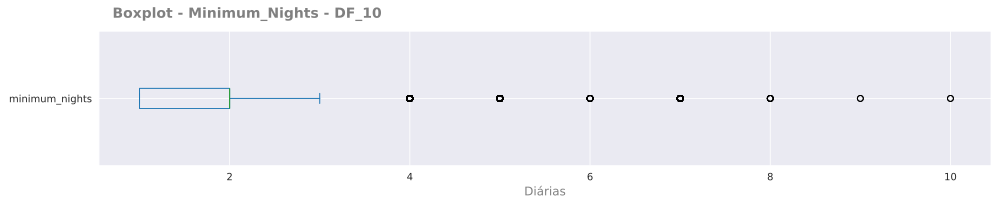

In [10]:
# 18 - Boxplot para a coluna minimum_nights para a base df_10
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (14,3), dpi = 150)
df_10.minimum_nights.plot(kind = "box", vert = False, ax = ax)
ax.text(0.7, 1.6, "Boxplot - Minimum_Nights - df_10", color = "grey", fontsize = 14, fontweight = "bold")
ax.set_ylabel("")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
plt.tight_layout()

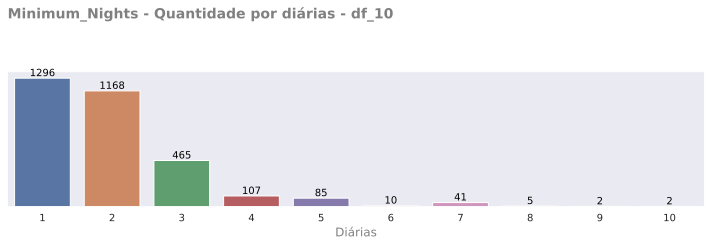

In [18]:
# 19 - Countplot com a contagem de dias
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize = (10,4), dpi = 150)
sns.set_style()
barras = sns.countplot(x = "minimum_nights", data = df_10, ax = ax, palette= "deep",
                       hue = "minimum_nights", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_height()),
              xy = (i.get_x() + i.get_width() / 2,
                    i.get_height()),
              color = "#000000",
              fontweight = "normal",
              ha = "center",
              va = "bottom")

plt.gca().axes.get_yaxis().set_visible(False)
ax.text(-0.5, 1900, "Minimum_Nights - Quantidade por diárias - df_10", color = "grey", fontsize = 14, fontweight = "bold")
ax.set_xlabel("Diárias", color = "grey", fontsize = 12)
ax.set_ylabel("")
plt.tight_layout()

Observando o gráfico acima é possível identificar que a maioria das locações do grupo ocorre nos primeiros **2 dias**.

Agora iremos verificar as principais **informações, distribuições e valores** de ambas as bases de dados

**DF_10**

In [11]:
# 21 - Verificando os  nomes dos bairros na base de dados df_10 com o método unique
df_10.neighbourhood.unique()

array(['Riley Park', 'Downtown', 'Hastings-Sunrise', 'Grandview-Woodland',
       'Arbutus Ridge', 'Mount Pleasant', 'Downtown Eastside',
       'Killarney', 'Kensington-Cedar Cottage', 'Kitsilano', 'West End',
       'Dunbar Southlands', 'West Point Grey', 'Strathcona',
       'South Cambie', 'Renfrew-Collingwood', 'Fairview', 'Marpole',
       'Sunset', 'Oakridge', 'Kerrisdale', 'Shaughnessy',
       'Victoria-Fraserview'], dtype=object)

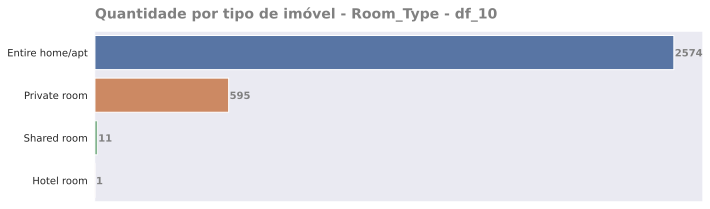

In [15]:
# 22 - Verificando a quantidade de tipos de imóveis para locação na base df_10
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
barras = sns.countplot(y = "room_type", data = df_10, ax = ax, orient = "h", palette = "deep",
                       hue = "room_type", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = (((i.get_width() + 5) - (i.get_height())),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "grey", fontweight = "bold",
                     ha = "left")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Quantidade por tipo de imóvel - Room_Type - df_10", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

É visível a preferencia pela **individualidade** para quem loca os imóvels por até **10 dias**, maior quantidade de locações na base **df_10** ocorre entre **apartamentos ou casas (Entire home/apt)** e **quartos individuais (Private room)**. As opções como **quarto de hotel** e o **quarto complatilhado** possuem locações mínimas na cidade de **Vancouver**.

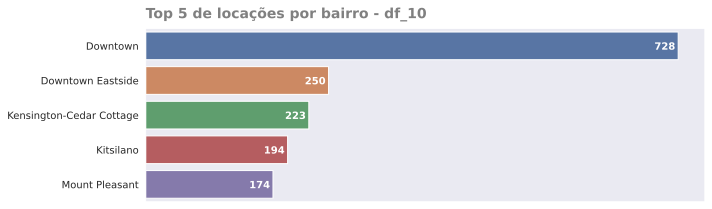

In [32]:
# 23 - Plotando a quantidade de locações por bairros
imoveis = df_10.groupby("neighbourhood").size().sort_values(ascending = False)[:5]
imoveis = pd.DataFrame(imoveis, columns = ["values"])
imoveis.reset_index(inplace = True)

fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
sns.set_style()
barras = sns.barplot(x = "values", y = "neighbourhood", data = imoveis, ax = ax, palette = "deep",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = ((i.get_width() - (i.get_height() * 5)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "white", fontweight = "bold",
                     ha = "right")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0, -0.8, "Top 5 de locações por bairro - df_10", fontsize = 14, color = "grey", fontweight = "bold")

ax.set_xlabel("Total de locações")
ax.set_ylabel("")
plt.tight_layout()

A maior quantidade de locações estão localizadad em **Downtown**, parte mais populosa da cidade com diversas atrações, além de possuir uma conexão direta com a **Stanley Park Causeway**, via que atravessa o Stanley Park e liga Vancouver com North Vancouver e **Downtown Eastside** um dos bairros mais antigos da cidade de Vancouver.

Text(0, 0.5, '')

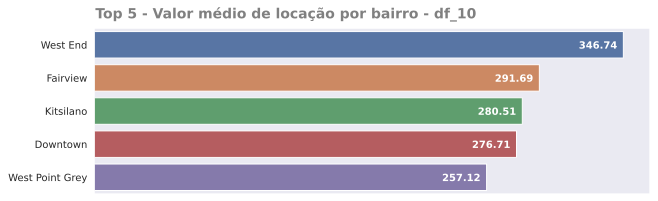

In [55]:
# 24 - Visualizando a "média" de preços por bairros ordenado pelo maior valor
price_mean = round(df_10.groupby(["neighbourhood"]).price.mean().sort_values(ascending = False)[:5], 2)
price_mean = pd.DataFrame(price_mean)
price_mean.reset_index(inplace = True)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)

barras = sns.barplot(x = "price", y = "neighbourhood", data = price_mean, ax = ax, palette = "deep",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(i.get_width(),
              xy = ((i.get_width() - (i.get_height() * 5)),
                    i.get_x() + i.get_y() + (i.get_height() / 2)),
              va = "center_baseline", color = "white", fontweight = "bold",
              ha = "right")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Top 5 - Valor médio de locação por bairro - df_10", fontsize = 14, color = "grey", fontweight = "bold")
ax.set_ylabel("")

O maior valor médio de locação está localizado proximo a Downtown, **West End** fica localizado próximo ao Stanley Park, no bairro também ficam localizados a **Sunset Beach** e ao **Vancouver Aquatic Centre**, já **Fairview** é localizado no coração da cidade oferecendo diferentes experiências gastronômicas, galerias de arte e trilhas existentes no **Charleson Park**.

**DF_30**

In [48]:
# 25 - Verificando os  nomes dos bairros na base de dados df_30 com o método unique
df_10.neighbourhood.unique()

array(['Riley Park', 'Downtown', 'Hastings-Sunrise', 'Grandview-Woodland',
       'Arbutus Ridge', 'Mount Pleasant', 'Downtown Eastside',
       'Killarney', 'Kensington-Cedar Cottage', 'Kitsilano', 'West End',
       'Dunbar Southlands', 'West Point Grey', 'Strathcona',
       'South Cambie', 'Renfrew-Collingwood', 'Fairview', 'Marpole',
       'Sunset', 'Oakridge', 'Kerrisdale', 'Shaughnessy',
       'Victoria-Fraserview'], dtype=object)

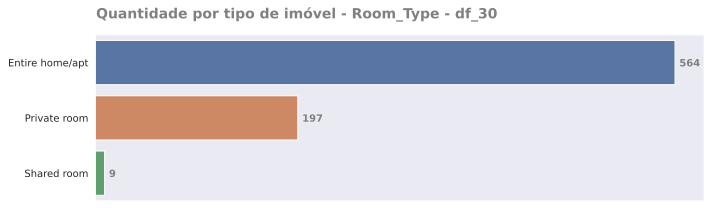

In [49]:
# 26 - Verificando a quantidade de tipos de imóveis para locação na base df_30
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)
barras = sns.countplot(y = "room_type", data = df_30, ax = ax, orient = "h", palette = "deep",
                       hue = "room_type", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = (((i.get_width() + 5) - (i.get_height())),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "grey", fontweight = "bold",
                     ha = "left")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Quantidade por tipo de imóvel - Room_Type - df_30", color = "grey", fontsize = 14, fontweight = "semibold")
ax.set_xlabel("")
ax.set_ylabel("")
plt.tight_layout()

A mesma situação se repete, para quem loca por até **30 dias** a **casa ou apartamento completos** e os **quartos individuais** representam aparentemente **98%**.

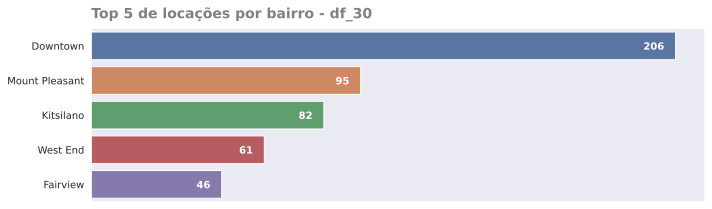

In [50]:
# 27 - Plotando a quantidade de locações por bairros
imoveis = df_30.groupby("neighbourhood").size().sort_values(ascending = False)[:5]
imoveis = pd.DataFrame(imoveis, columns = ["values"])
imoveis.reset_index(inplace = True)

fig, ax = plt.subplots(figsize = (10,3), dpi = 150)
sns.set_style()
barras = sns.barplot(x = "values", y = "neighbourhood", data = imoveis, ax = ax, palette = "deep",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(int(i.get_width()),
              xy = ((i.get_width() - (i.get_height() * 5)),
                     i.get_x() + i.get_y() + (i.get_height() / 2)),
                     va = "center_baseline", color = "white", fontweight = "bold",
                     ha = "right")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0, -0.8, "Top 5 de locações por bairro - df_30", fontsize = 14, color = "grey", fontweight = "bold")

ax.set_xlabel("Total de locações")
ax.set_ylabel("")
plt.tight_layout()

Assim como o grupo que loca por até 10 dias **Downtown** foi o bairro com mais locações no grupo de até **30 dias**, porém diferente de antes **Mount Plesant** foi o segundo bairro mais locado, ele fica **localizado entre Fairview e Downtown Eastside**, possuindo diversas galerias de arte, lojas especializadas para atividades ao ar livre, diversos parque e ficando próximo ao **Science World**, um museu de ciências interativo.

Text(0, 0.5, '')

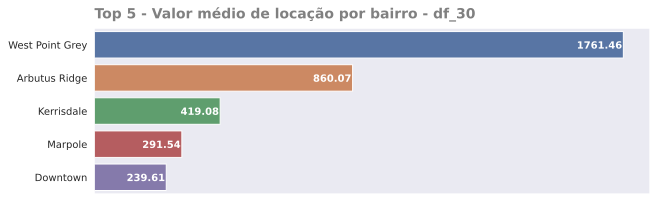

In [51]:
# 28 - Visualizando a "média" de preços por bairros ordenado pelo maior valor
price_mean = round(df_30.groupby(["neighbourhood"]).price.mean().sort_values(ascending = False)[:5], 2)
price_mean = pd.DataFrame(price_mean)
price_mean.reset_index(inplace = True)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10, 3), dpi = 150)

barras = sns.barplot(x = "price", y = "neighbourhood", data = price_mean, ax = ax, palette = "deep",
                     hue = "neighbourhood", legend = False)

for i in barras.patches:
  ax.annotate(i.get_width(),
              xy = ((i.get_width() - (i.get_height() * 5)),
                    i.get_x() + i.get_y() + (i.get_height() / 2)),
              va = "center_baseline", color = "white", fontweight = "bold",
              ha = "right")

plt.gca().axes.get_xaxis().set_visible(False)
ax.text(0.7, -0.8, "Top 5 - Valor médio de locação por bairro - df_30", fontsize = 14, color = "grey", fontweight = "bold")
ax.set_ylabel("")

Os maiores valores médios de locação com **excessão de Downtown** estão proximos, todos são **bairros residenciais** localizados mais ao oeste da cidade, próximos a parques.

**Conclusão**

A análise deixou claro que existem **2 grupos** distintos de locatarios que locam em bairros que priorizam tanto **centros culturais, gastronômicos e ecoturismo** quanto **pontos residenciais**. Para a análise foram priorizadas **análises diretas** para a compreensão de quais os **tipos de imóveis locados**, a **quantidade de locações por bairro** e seus **valores médios**.